# Parkinson's disease based on voice recording

## Data Description and Context:
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

## Domain:
Medicine
    
## Attribute Information:
* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
* measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 9. 
* car name: string (unique for each instance)

    
## Learning Outcomes:
● Exploratory Data Analysis

● Supervised Learning

● Ensemble Learning

## Objective:
Goal is to classify the patients into the respective labels using the attributes from their voice recordings

# Importing libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import scipy.stats as stats
import numpy as np
from pandas.api.types import is_numeric_dtype
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.stats import gamma
from sklearn.preprocessing import StandardScaler
sns.set(color_codes=True)
%matplotlib inline

# Loading data into dataframe

In [ ]:
df = pd.read_csv("datasets_410614_786211_parkinsons.csv")

In [ ]:
df.shape

(195, 24)

#### We have a total of 23 features and 195 rows of data

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Some preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#### Observation: We can see that all the features except our target feature status is continous but we should convert status to object data type since it is a binary categorical feature 

## Checking for null values

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### Observations: From above we can observe that there are no null values

## Check for duplicate names

In [ ]:
len(df['name'].unique())

195

In [ ]:
df.shape[0]

195

#### Observations: Since number of rows is equivalent to count of unique values of column 'name' , hence there are no duplicate values of feature 'name'

## Converting status to object data type

In [ ]:
df['status'].unique()

array([1, 0])

It is a binary categorical data as we observed with only 2 unique values i.e 0 and 1

In [ ]:
df['status'] = df['status'].astype('object')   #astype is used for cast a pandas object to specified dtype

In [ ]:
df.info(verbose = True)    # verbose = True does not return not null count to large data frames

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Exploratory Data Analysis(EDA)

## Functions to ease up plotting of various continous variables

In [ ]:
def Distribution_Continous_Variables(series,color,title):
    plt.figure(figsize=(10, 5))
    sns.distplot(series, color = color).set_title(title)
    
def Print_Summary(series,title,var):
    print(title)
    print('Count = {1}'.format(var,len(series)))
    print('Mean of {0} = {1}'.format(var,series.mean()))
    print('Median of {0} = {1}'.format(var,series.median()))
    print('Mode of {0} = {1}'.format(var,series.mode().values[0]))
    print('Skewness of {0} = {1}'.format(var, series.skew()))
    print('Excess Kurtosis of {0} = {1}'.format(var,series.kurtosis()))
    print(100*"*")

def Coeff_Variation(series,title,var):
    print('CV of {0} for {1} = {2}'.format(var,title,(series.std()/series.mean())*100))

def BoxPlot(**kwargs):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x = kwargs['x'], \
                y = kwargs['y'], \
                data = kwargs['data'], \
                color = kwargs['color'], \
                hue = kwargs['hue']).set_title(kwargs['title'])    

def ViolinPlot(**kwargs):
    plt.figure(figsize=(10, 5))
    sns.violinplot(x = kwargs['x'], \
                y = kwargs['y'], \
                data = kwargs['data'], \
                color = kwargs['color'], \
                hue = kwargs['hue']).set_title(kwargs['title']) 
    
        
def CountPlot(**kwargs):
    plt.figure(figsize=(10, 5))
    sns.countplot(y=kwargs['y'], \
                    hue=kwargs['hue'], \
                    data=kwargs['data']).set_title(kwargs['title'])
    
   

In [ ]:
list_of_non_object_cols = df.loc[:, df.dtypes != 'object'].columns.tolist()

## Univariate Analysis

### Plots to analyse impact of continous on the status

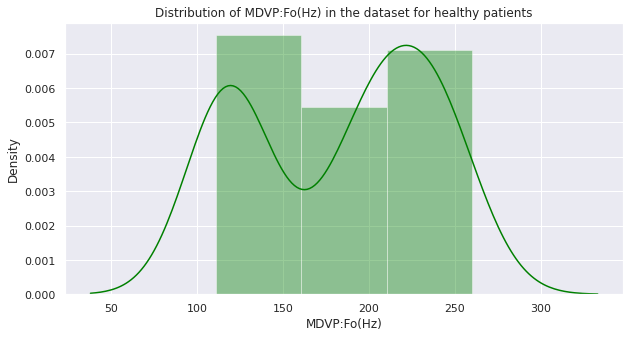

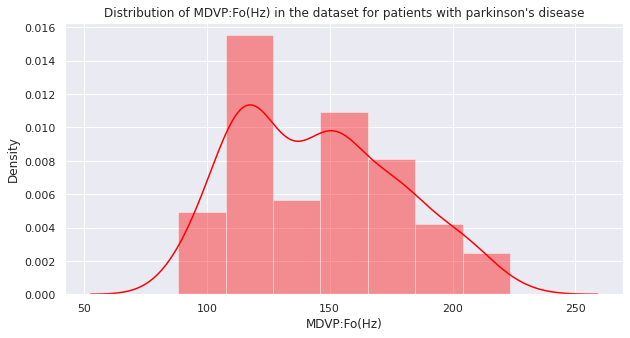

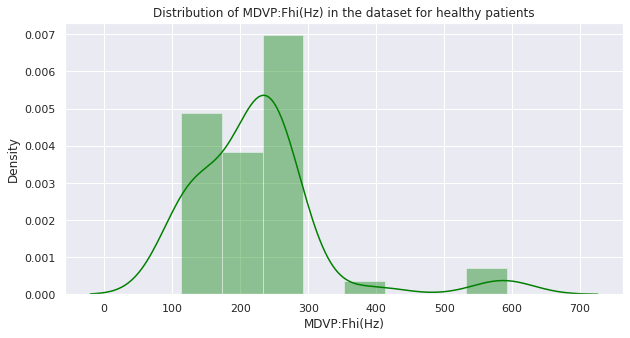

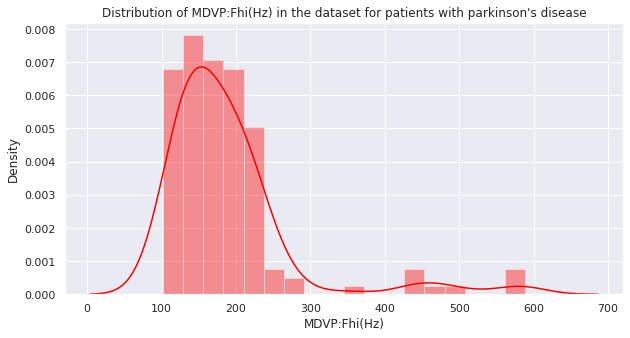

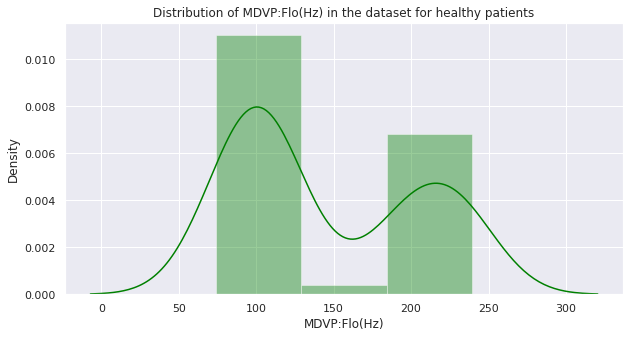

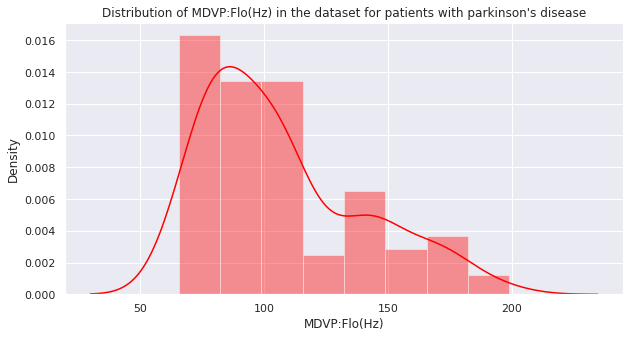

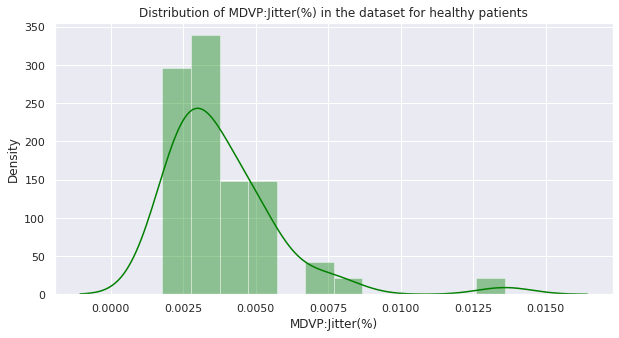

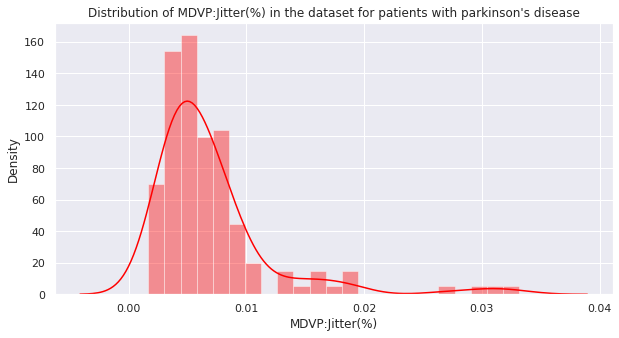

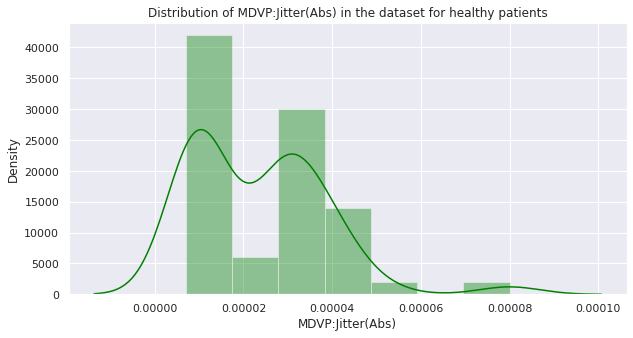

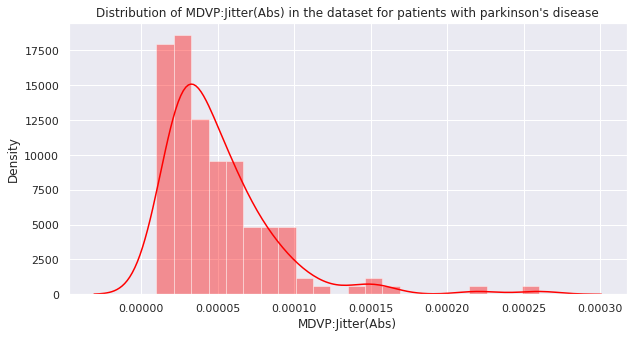

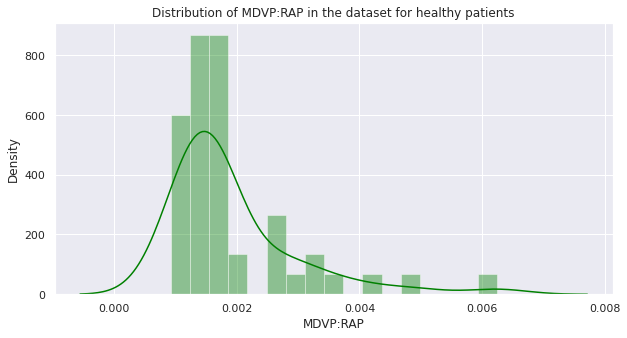

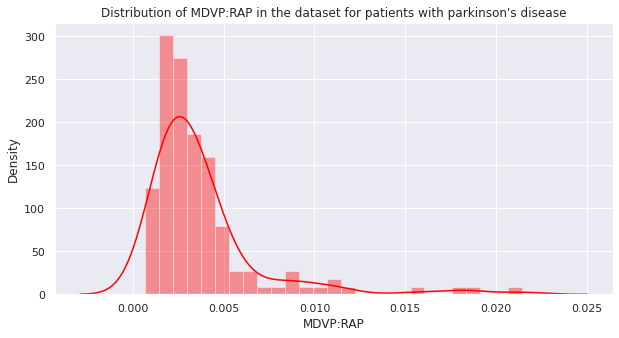

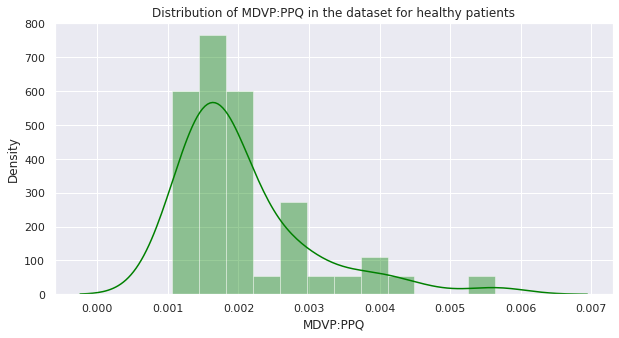

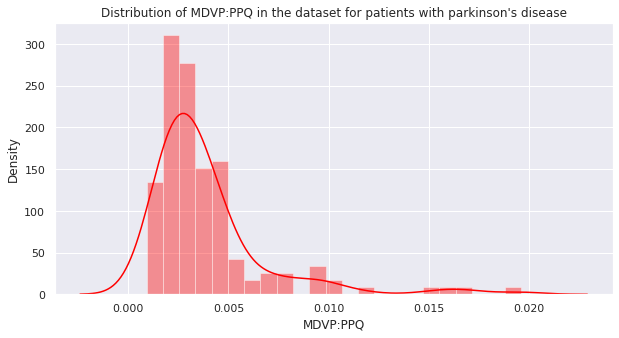

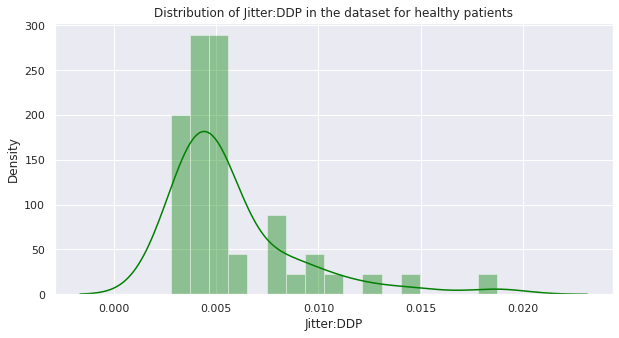

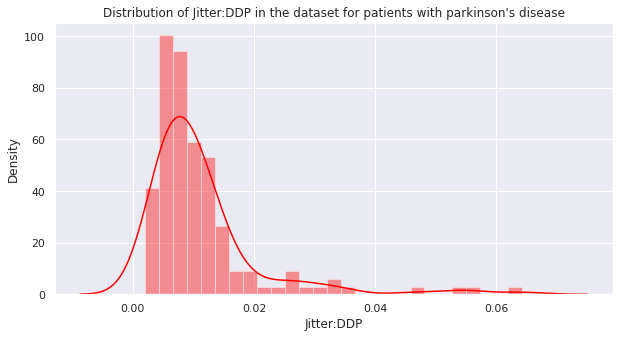

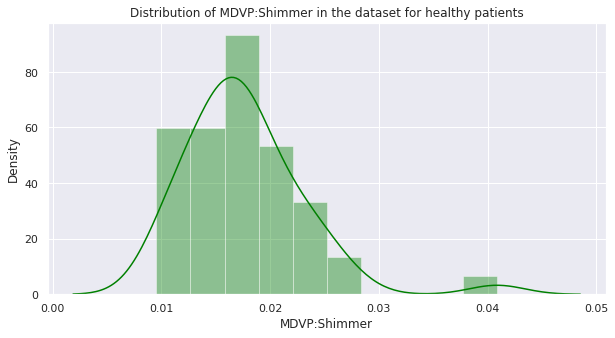

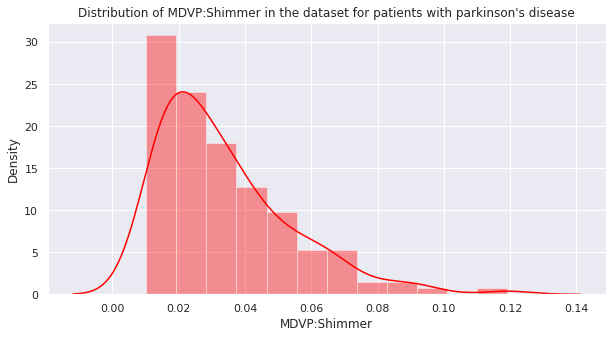

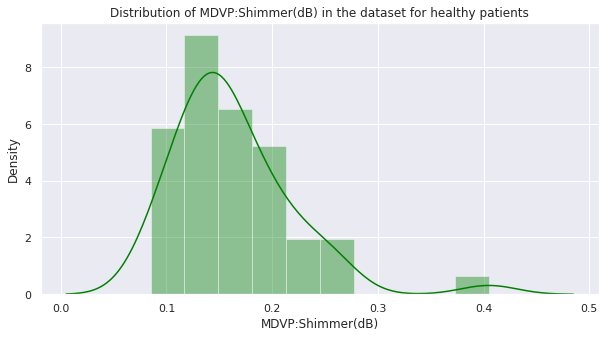

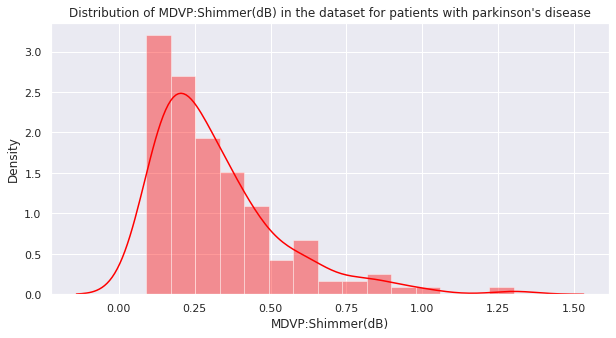

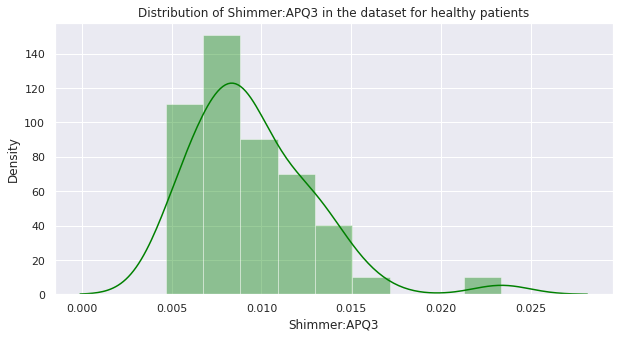

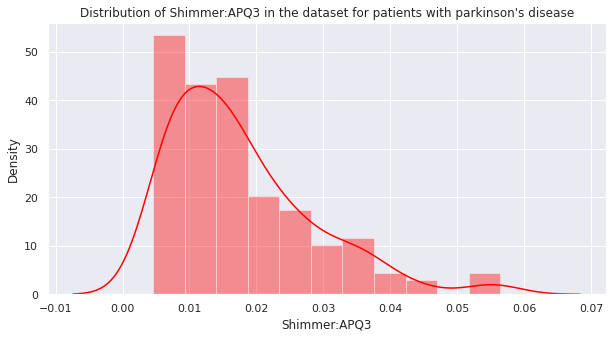

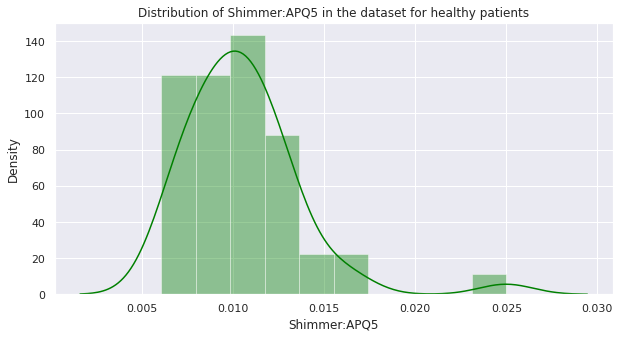

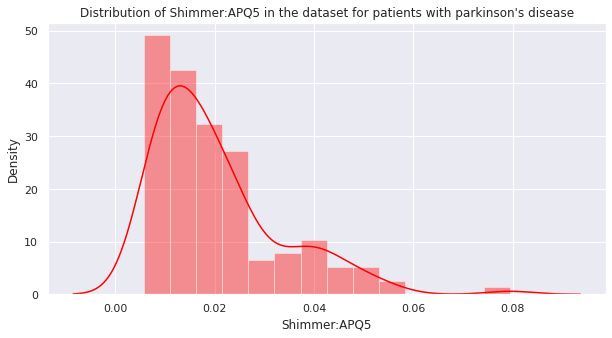

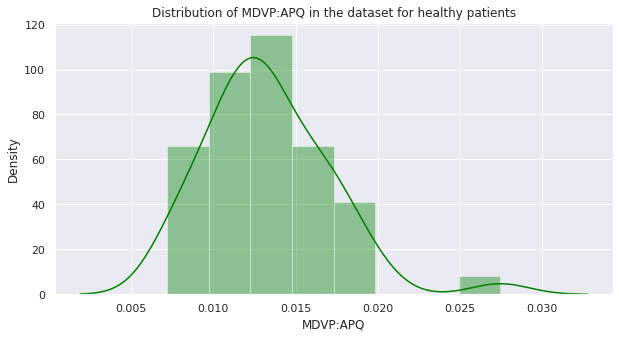

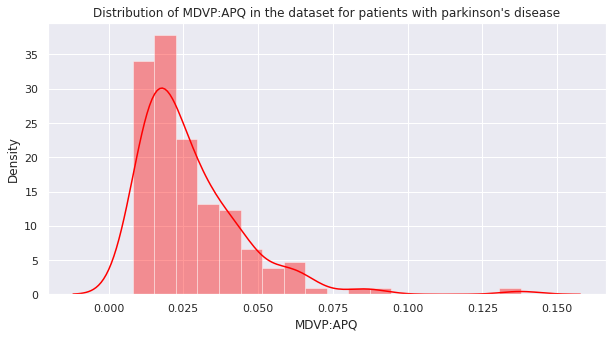

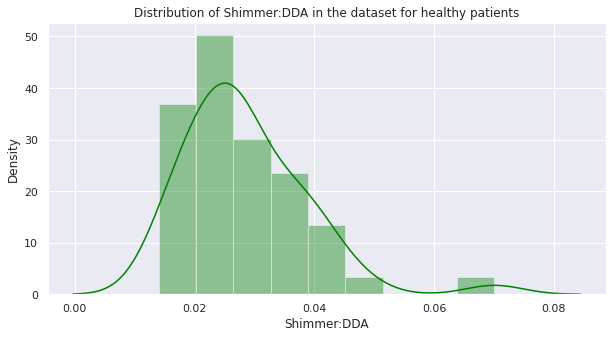

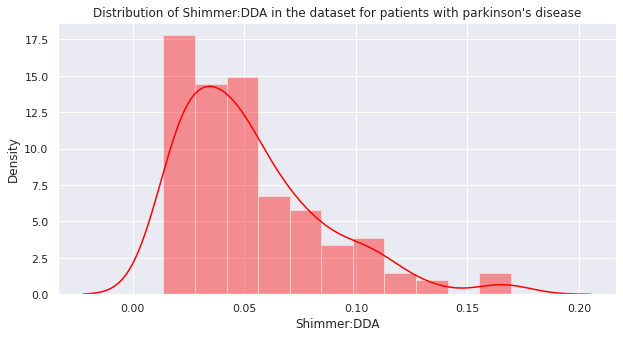

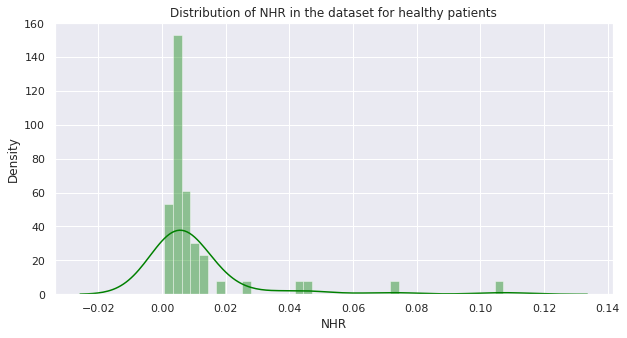

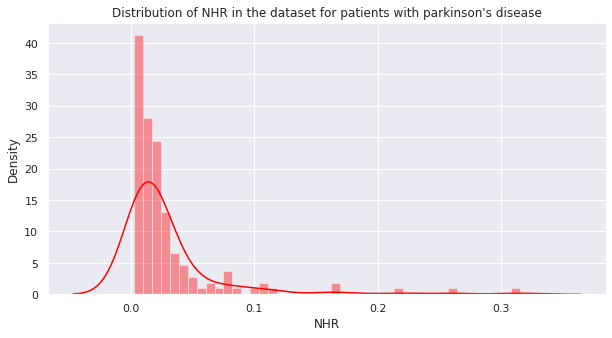

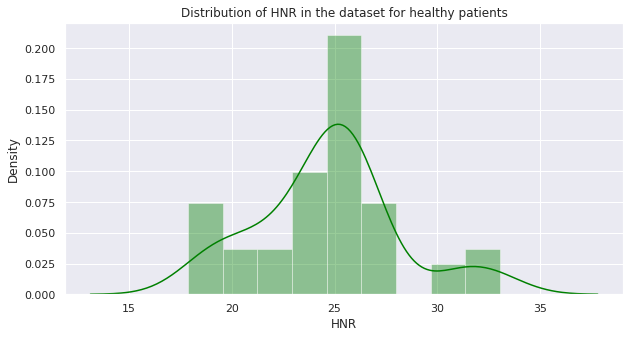

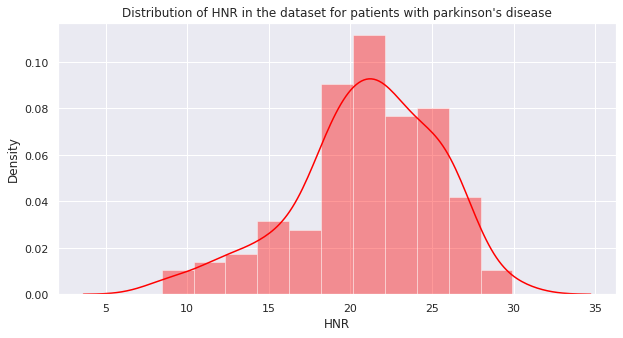

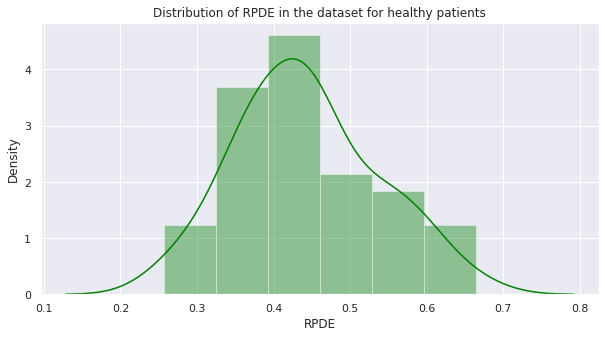

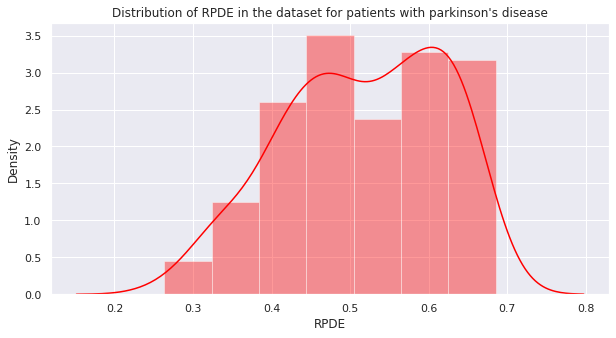

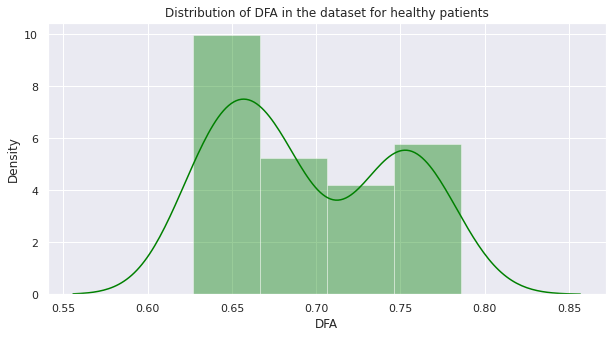

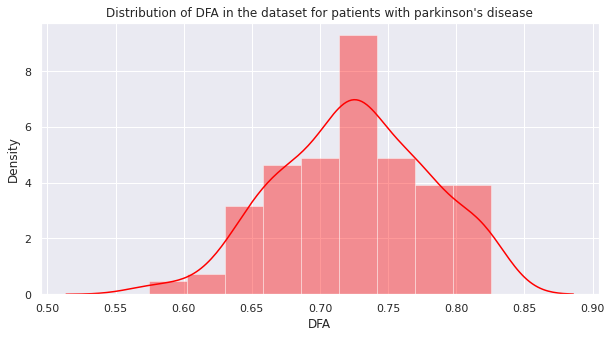

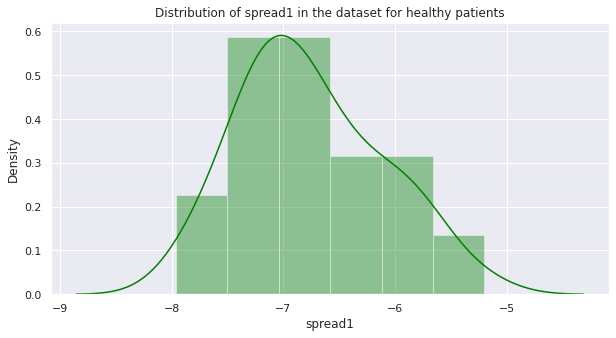

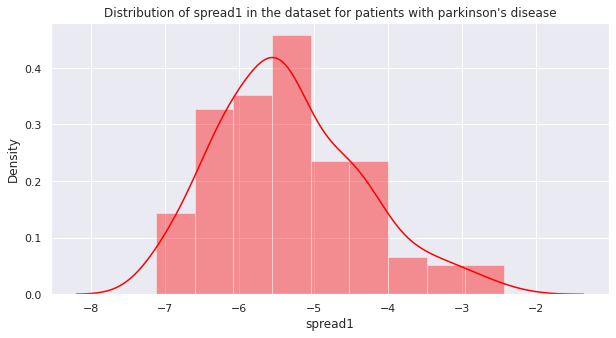

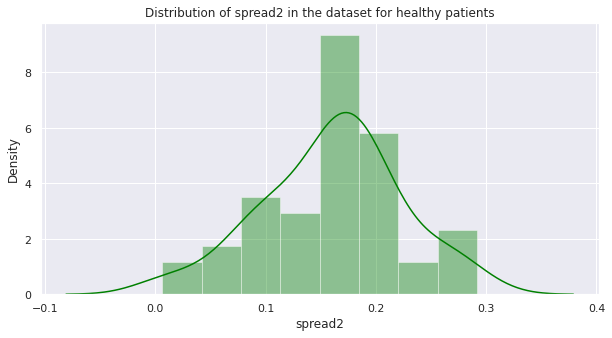

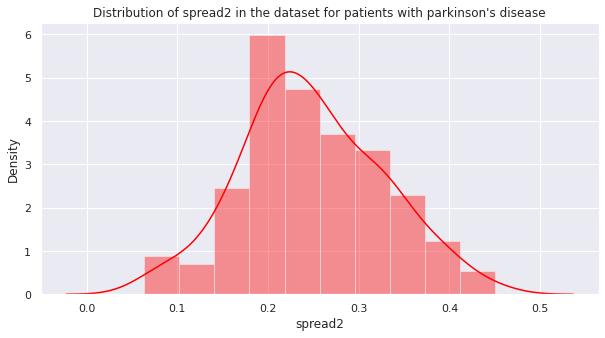

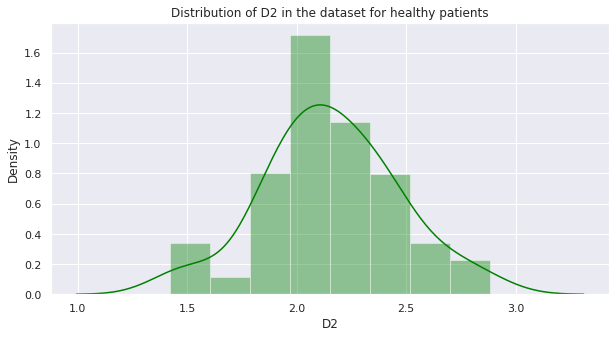

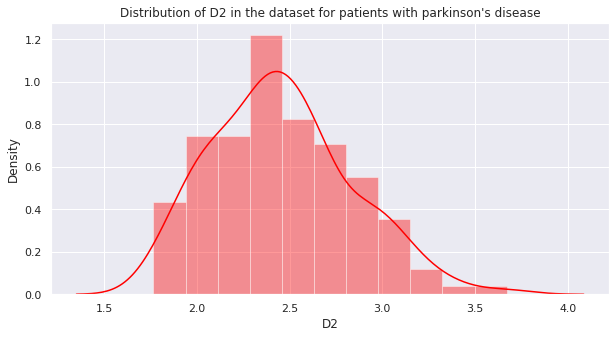

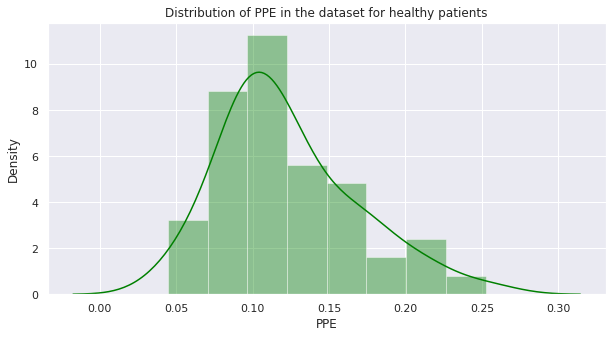

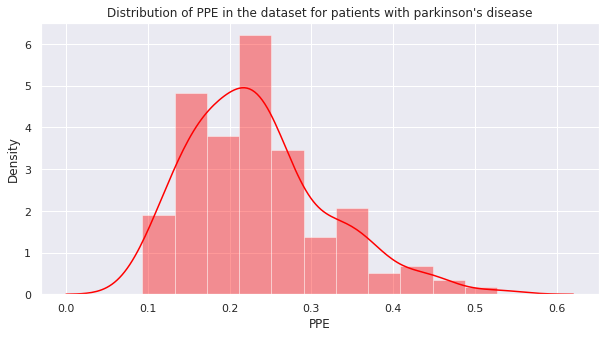

In [ ]:
for col in list_of_non_object_cols:
    Distribution_Continous_Variables(df[df['status']==0][col],"green","Distribution of {} in the dataset for healthy patients"\
                                    .format(col))
    Distribution_Continous_Variables(df[df['status']==1][col],"red","Distribution of {} in the dataset for patients with parkinson's disease"\
                                    .format(col))

#### Observations: 
* From the above set of graphs we can observe that majority of our continous variables are skewed to the right and we cannot observe any perfectly normally distributed continous variable.
* This somehow provides us a rough idea that our dataset is full of outliers that we need to get rid of.

#### Next we will try to get a numerical summary pertaining to our features to further consolidate our observation

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [ ]:
for col in list_of_non_object_cols:
    Print_Summary(df[df['status']==0][col],"Numerical Summary of {} for healthy patients"\
                                    .format(col),col)
    Print_Summary(df[df['status']==1][col],"Numerical Summary of {} for patients with parkinson's disease"\
                                    .format(col),col)

Numerical Summary of MDVP:Fo(Hz) for healthy patients
Count = 48
Mean of MDVP:Fo(Hz) = 181.9377708333333
Median of MDVP:Fo(Hz) = 198.996
Mode of MDVP:Fo(Hz) = 110.739
Skewness of MDVP:Fo(Hz) = -0.2060804755435577
Excess Kurtosis of MDVP:Fo(Hz) = -1.6481907157014024
****************************************************************************************************
Numerical Summary of MDVP:Fo(Hz) for patients with parkinson's disease
Count = 147
Mean of MDVP:Fo(Hz) = 145.18076190476197
Median of MDVP:Fo(Hz) = 145.174
Mode of MDVP:Fo(Hz) = 88.333
Skewness of MDVP:Fo(Hz) = 0.36684955948316283
Excess Kurtosis of MDVP:Fo(Hz) = -0.7956530227883039
****************************************************************************************************
Numerical Summary of MDVP:Fhi(Hz) for healthy patients
Count = 48
Mean of MDVP:Fhi(Hz) = 223.63675
Median of MDVP:Fhi(Hz) = 231.1615
Mode of MDVP:Fhi(Hz) = 113.597
Skewness of MDVP:Fhi(Hz) = 2.1913567763615234
Excess Kurtosis of MDVP:Fhi(Hz) = 6.98

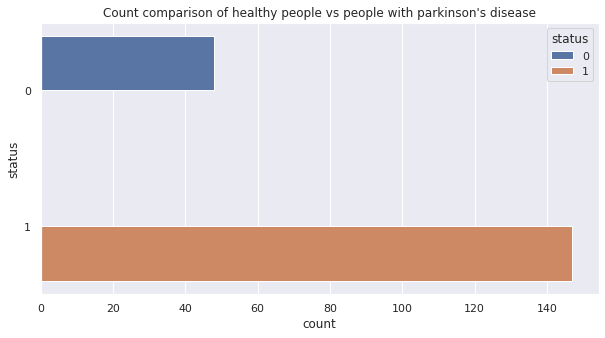

In [ ]:
CountPlot(y = 'status',\
          hue = 'status',\
          data = df,\
          title = "Count comparison of healthy people vs people with parkinson's disease")

In [ ]:
print("Percentage of patients diagnosed as healthy = {0:.2f}%".format((df[df.status == 0].shape[0]/df.shape[0])*100))

Percentage of patients diagnosed as healthy = 24.62%


In [ ]:
print("Percentage of patients diagnosed with Parkinson's disease = {0:.2f} %".format((df[df.status == 1].shape[0]/df.shape[0])*100))

Percentage of patients diagnosed with Parkinson's disease = 75.38 %


#### Observations:
* The data is imbalanced since we have 24.6 % of healthy patients while 75.38 % are sick.
* PPE for healthy patients,spread2 for both types of subjects, RPDE for both types of subjects tend to have a normal distribution as per their statisticals values while other features seem to be skewed.

* #### We will plot boxplot now to observe if our continous features have outliers or not. The boxplot uses IQR method to   detect outliers. Also boxplot would give a visual representation of the five point summary
* #### We will also plot violinplot along with boxplots to compare the distributions as well.

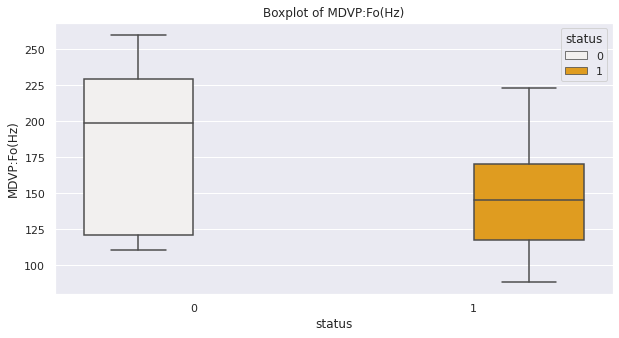

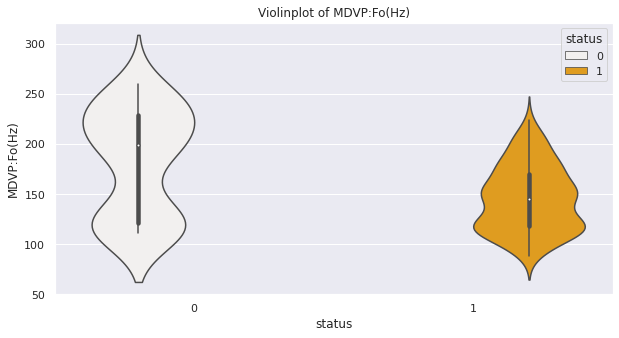

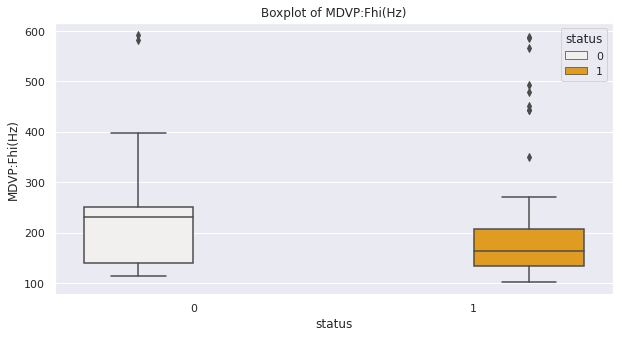

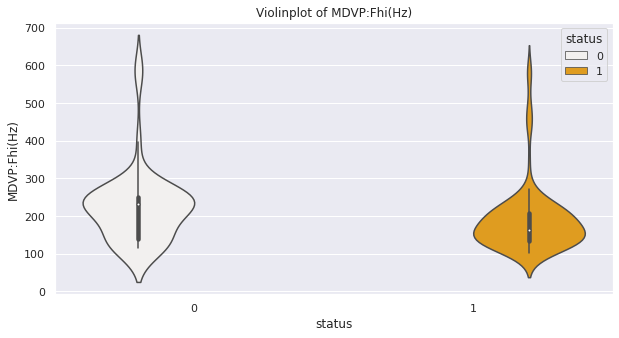

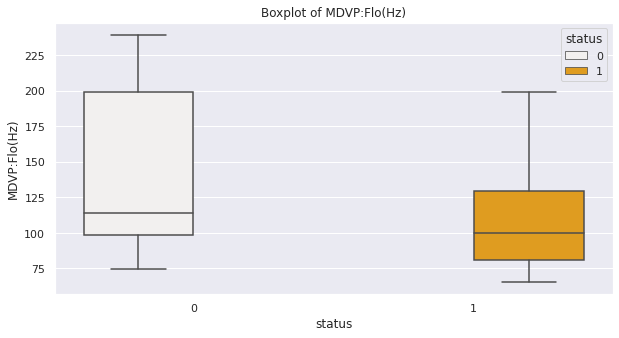

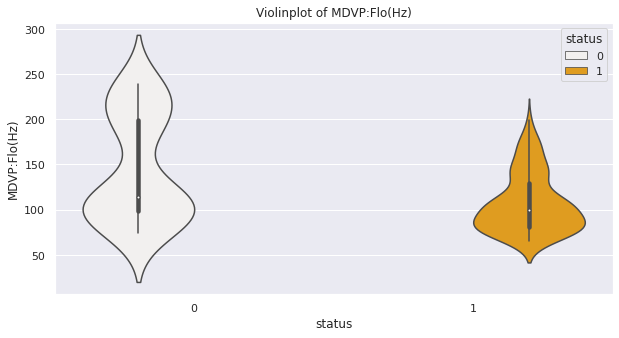

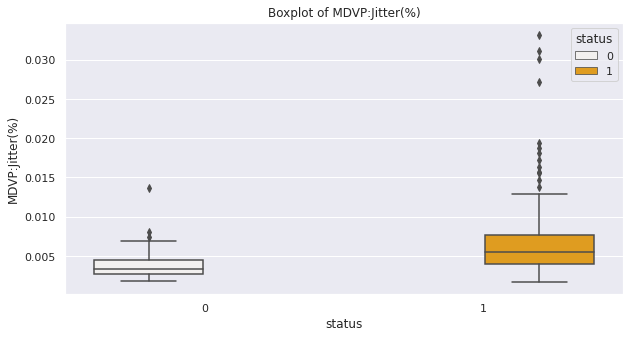

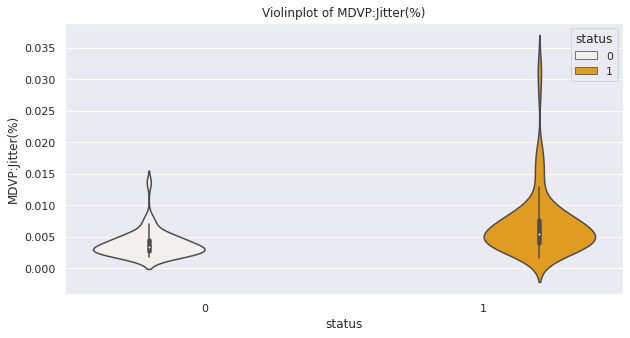

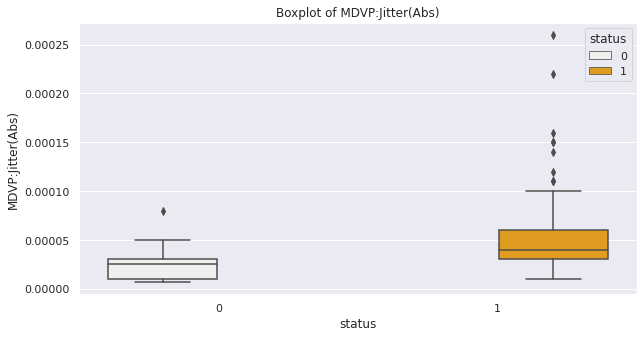

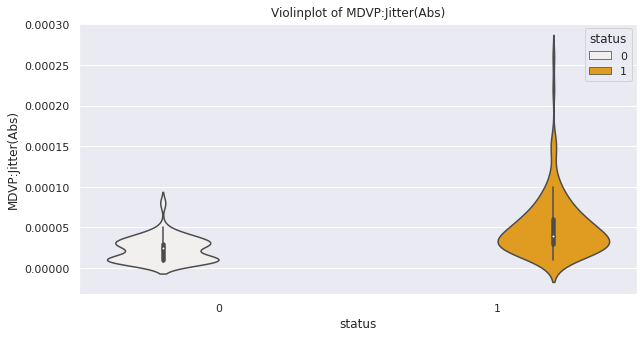

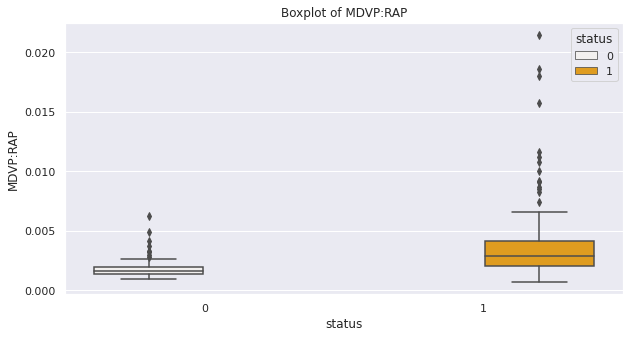

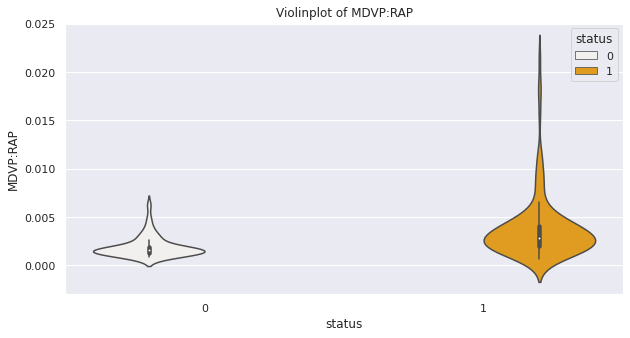

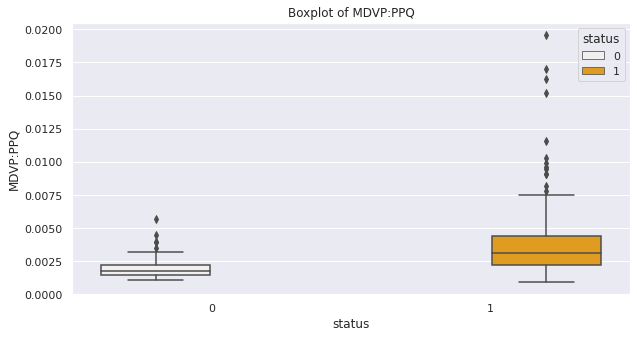

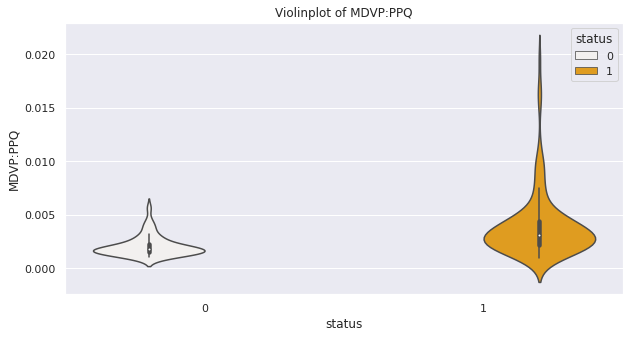

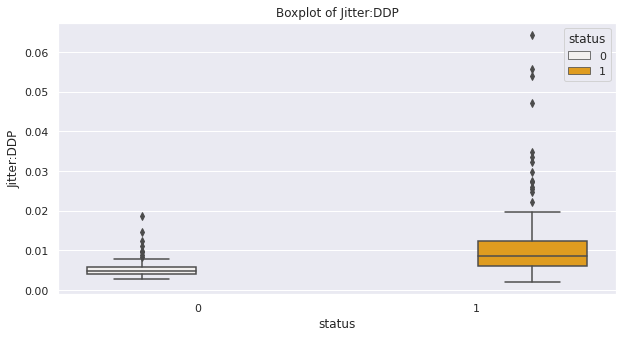

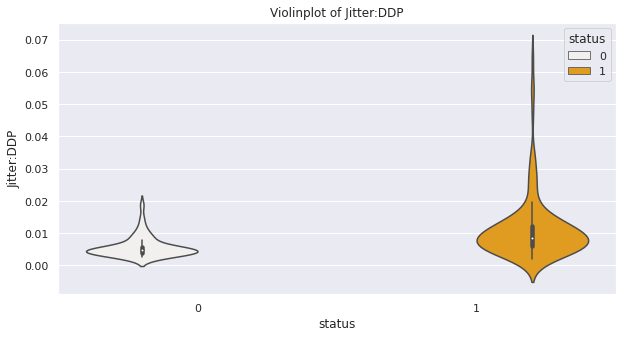

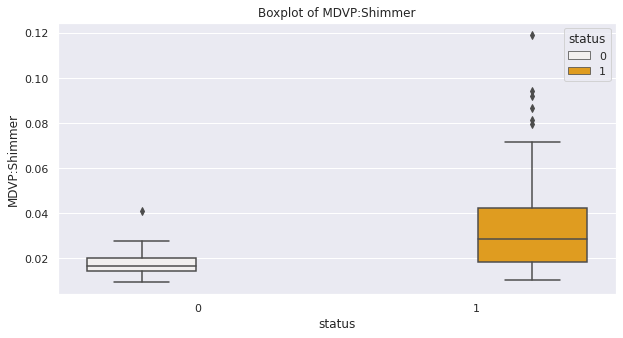

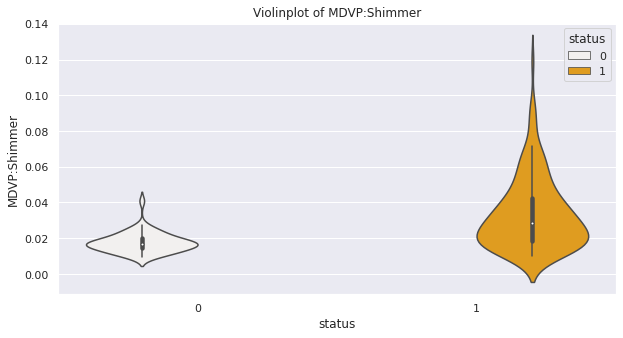

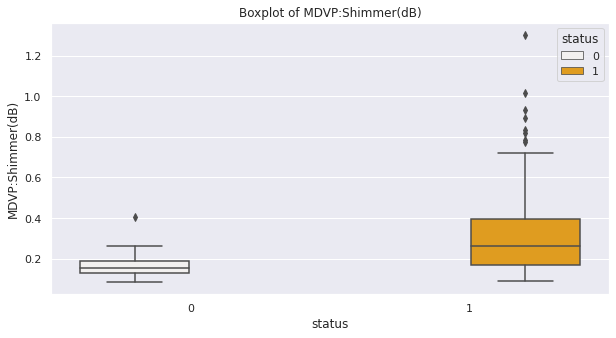

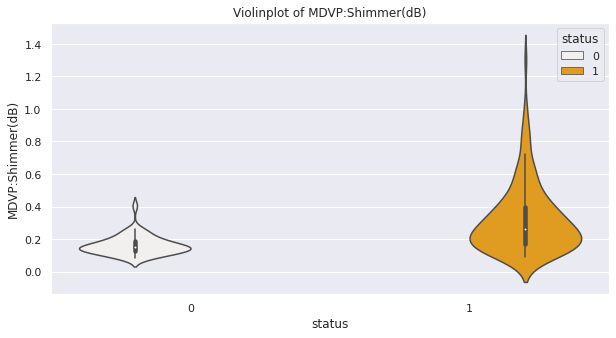

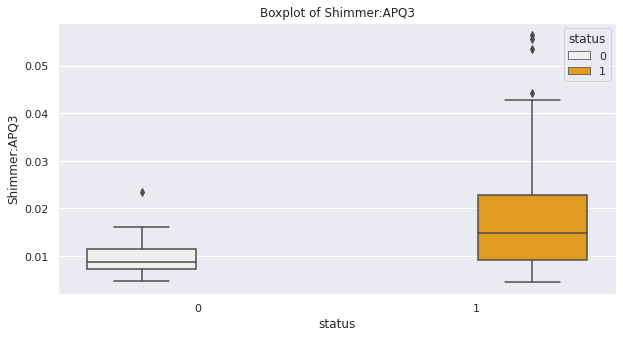

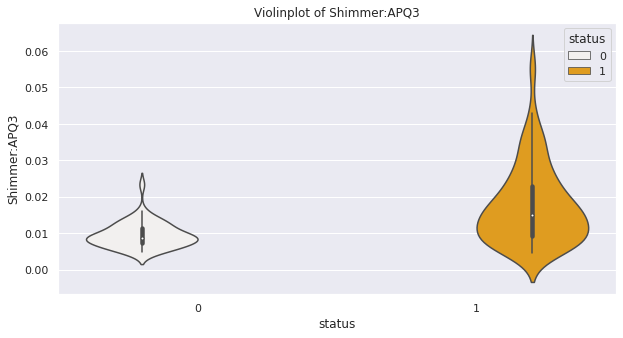

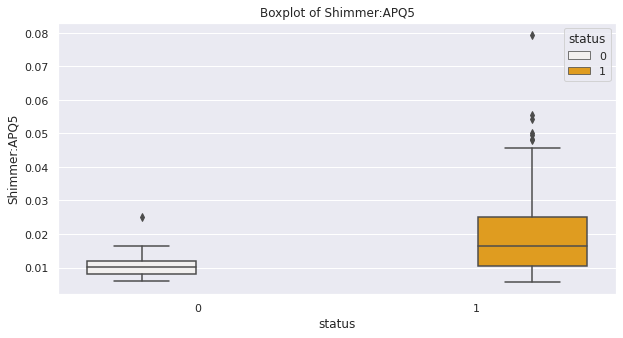

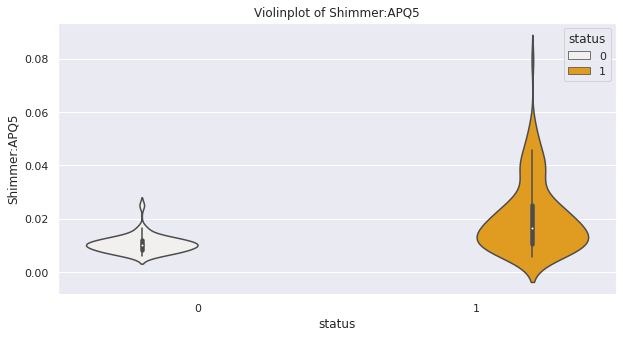

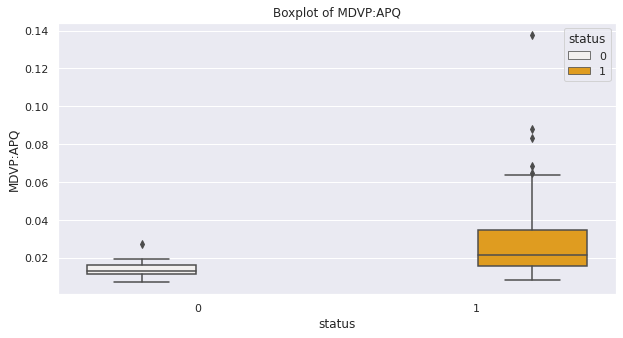

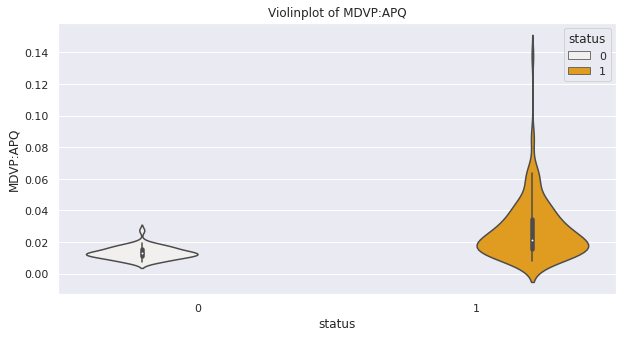

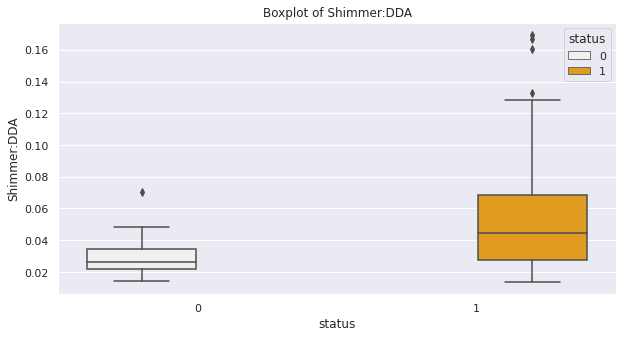

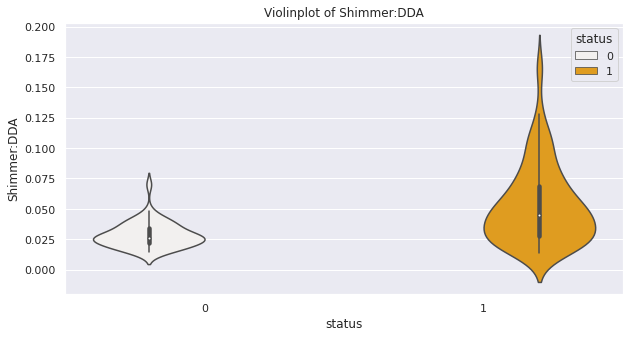

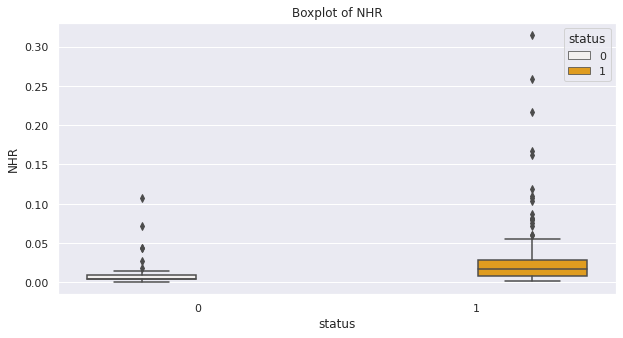

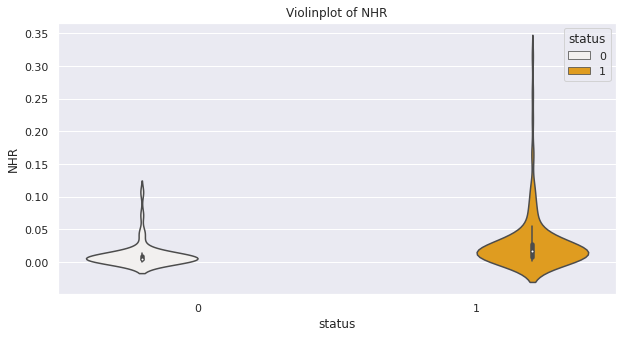

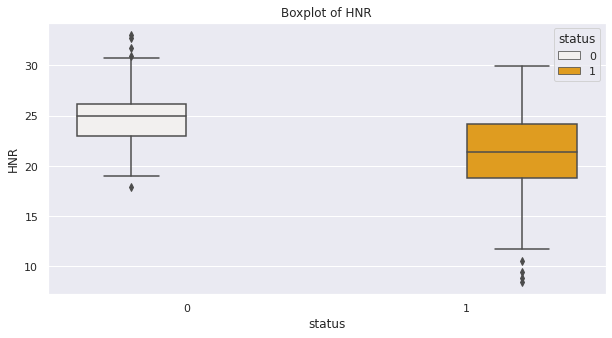

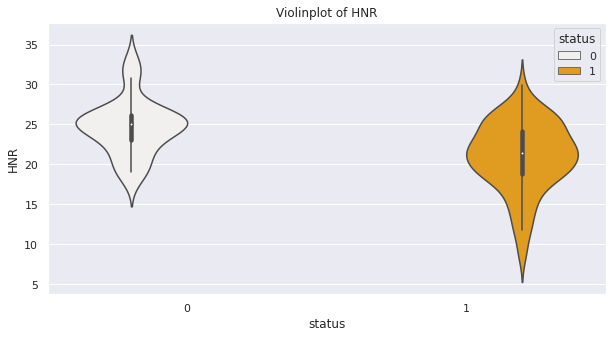

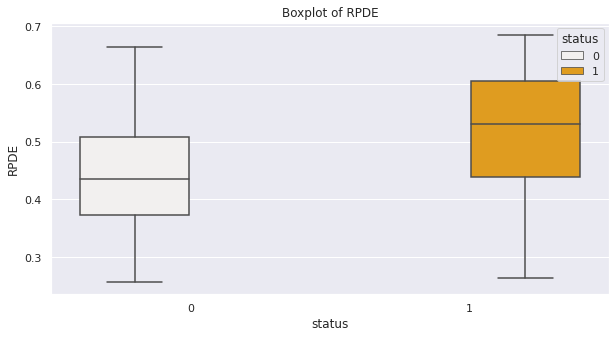

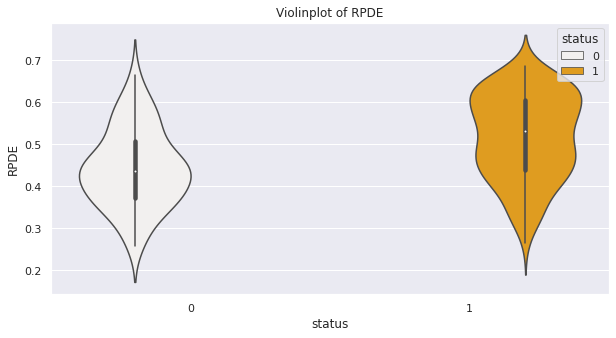

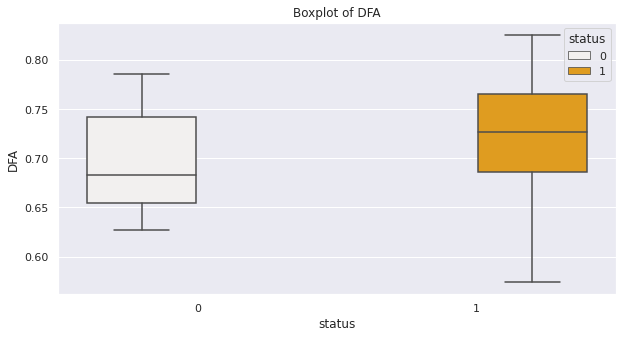

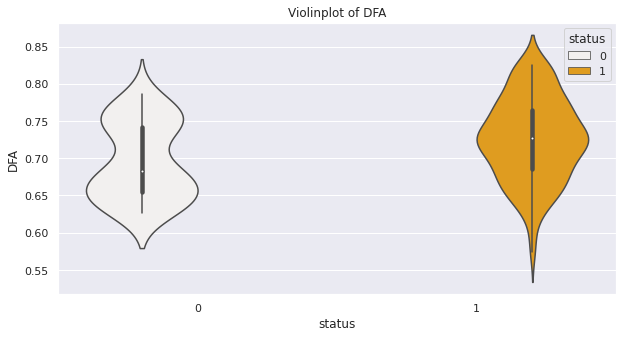

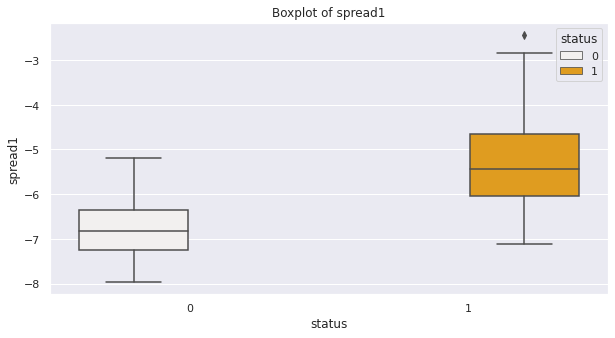

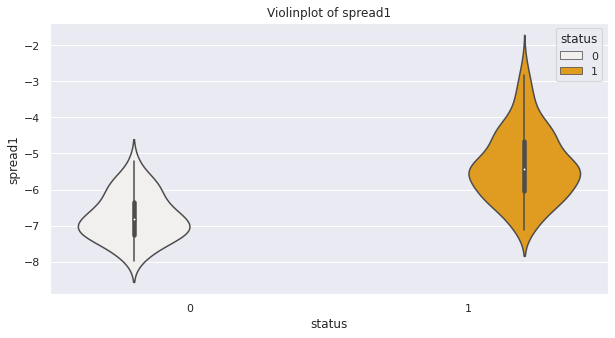

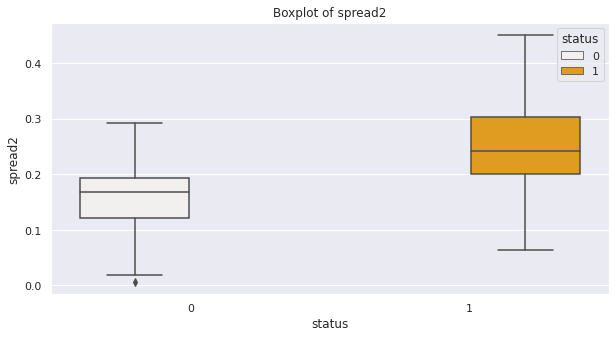

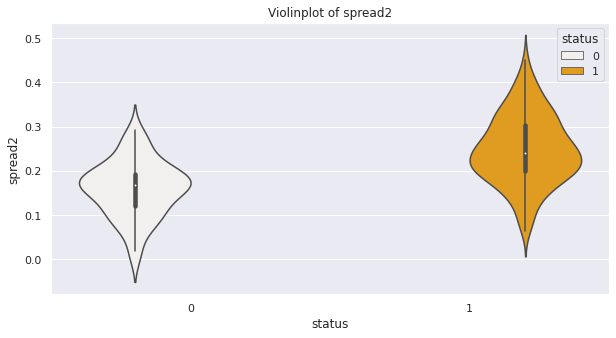

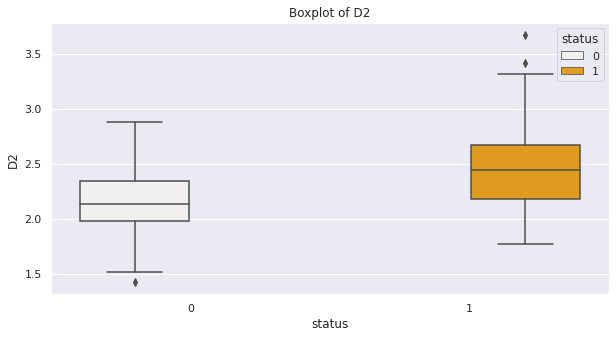

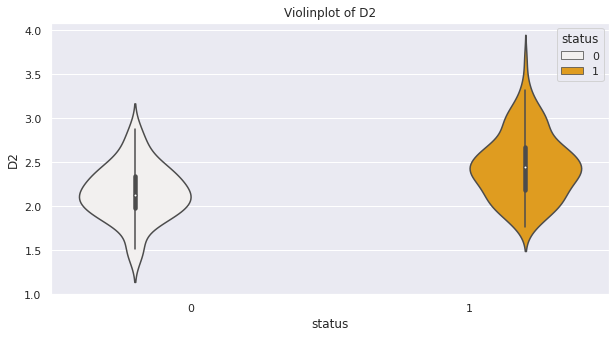

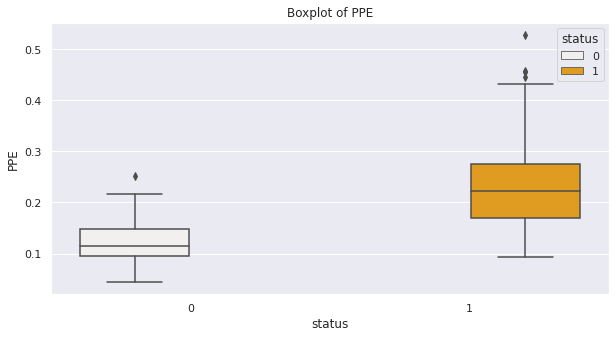

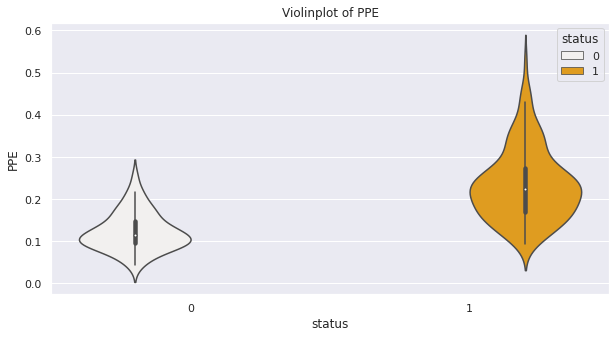

In [ ]:
for col in list_of_non_object_cols:
    BoxPlot(x = 'status',\
            y = col,\
            data = df,\
            color = 'orange',\
            hue = 'status',\
            title = 'Boxplot of {}'.format(col))

    ViolinPlot(x = 'status',\
            y = col,\
            data = df,\
            color = 'orange',\
            hue = 'status',\
            title = 'Violinplot of {}'.format(col))

#### Observations : Except MDVP:Fo(Hz),MDVP:Flo(Hz),RPDE and DFA every other feature has outliers as per IQR method.

### Coefficient of Variation(CV) of continous variables
* CV is relative comparison of the distributions with respect to their standard deviations.
* This is unit agnostic i.e units do not have any impact on its value
* Greater the number ,greater is the variability

In [ ]:
for col in list_of_non_object_cols:
    Coeff_Variation(df[df['status']==0][col],"for healthy subjects".format(col),col)
    Coeff_Variation(df[df['status']==1][col],"for patients with Parkinson's disease".format(col),col)
    print(100*"*")

CV of MDVP:Fo(Hz) for for healthy subjects = 28.983023635510985
CV of MDVP:Fo(Hz) for for patients with Parkinson's disease = 22.28122339755118
****************************************************************************************************
CV of MDVP:Fhi(Hz) for for healthy subjects = 43.251865846856944
CV of MDVP:Fhi(Hz) for for patients with Parkinson's disease = 46.878844213115364
****************************************************************************************************
CV of MDVP:Flo(Hz) for for healthy subjects = 40.46426993695542
CV of MDVP:Flo(Hz) for for patients with Parkinson's disease = 30.192986911149415
****************************************************************************************************
CV of MDVP:Jitter(%) for for healthy subjects = 53.145390873734314
CV of MDVP:Jitter(%) for for patients with Parkinson's disease = 74.96921231157417
****************************************************************************************************
CV of MDV

## BiVariate Analysis

### Pairplot with Status as hue

In [ ]:
sns.pairplot(df, hue = 'status')
plt.show()

#### Observations: From the plot we could see that there might be positive or negative correlation between certain variables.Like between spread1 and PPE there seems to be a positive correlation. We will further analyse the correlation by meausring pearson coefficient of correlation between all features

### Measuring correlation

(22.5, -0.5)

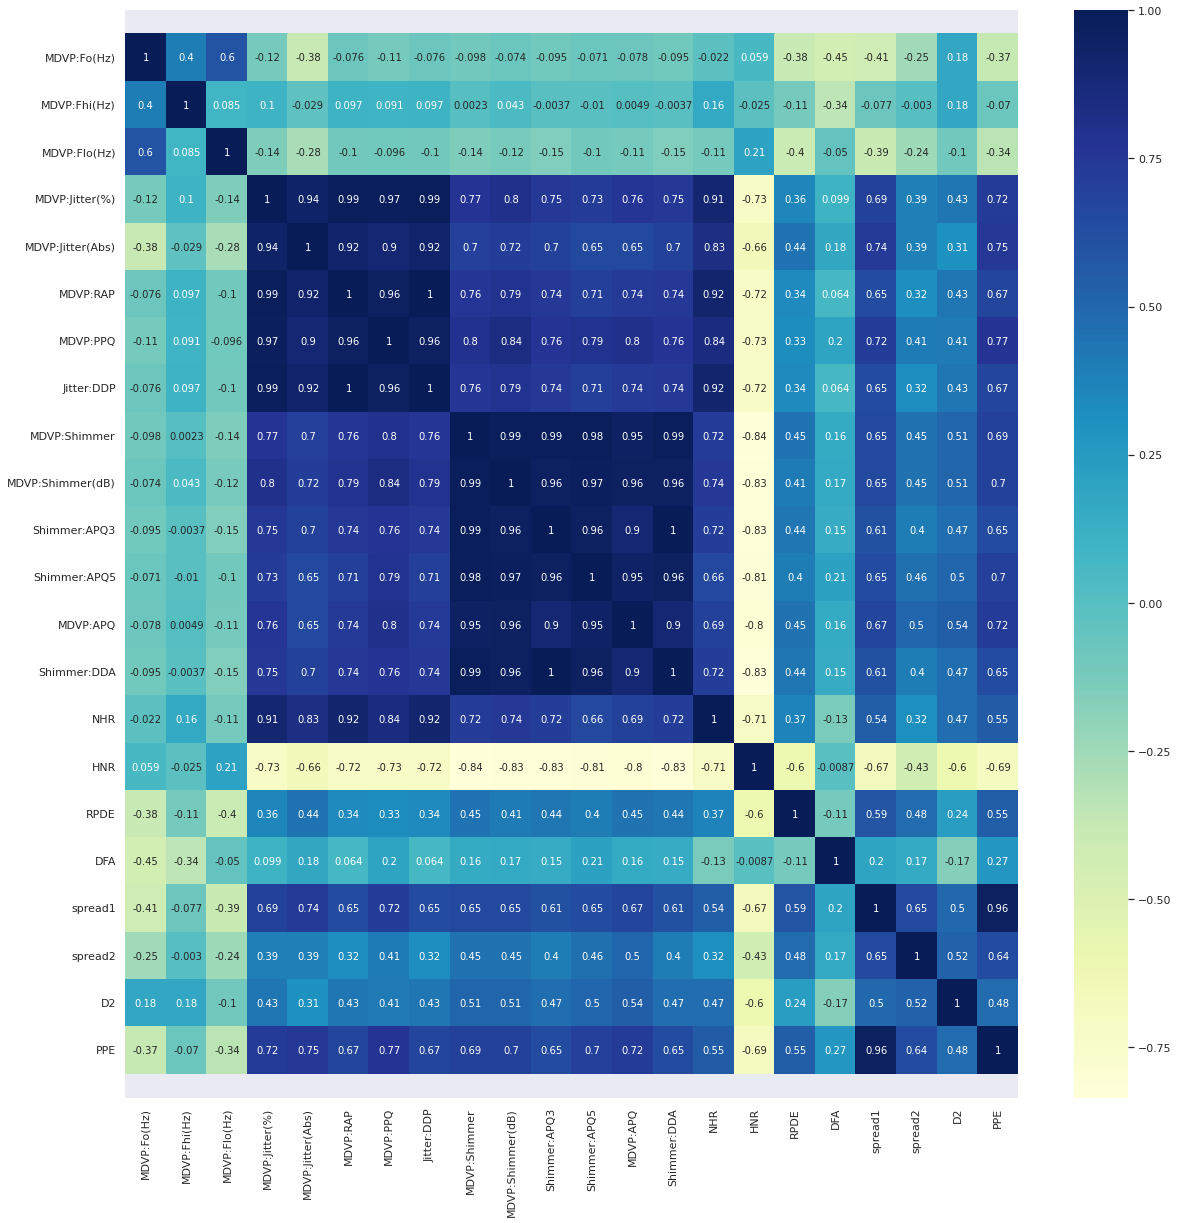

In [ ]:
plt.figure(figsize=(20, 20))
df_corr = df.corr(method='pearson')
ax = sns.heatmap(df_corr, annot=True, cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Let's plot highly positively correlated or negatively correlated features. We will use 0.80 and -0.80 as our threshold correlation coefficient for positive and negative correlations respectively. Usually ensemble mehtods handle correlations well but highly correlated features may create problems.

(22.5, -0.5)

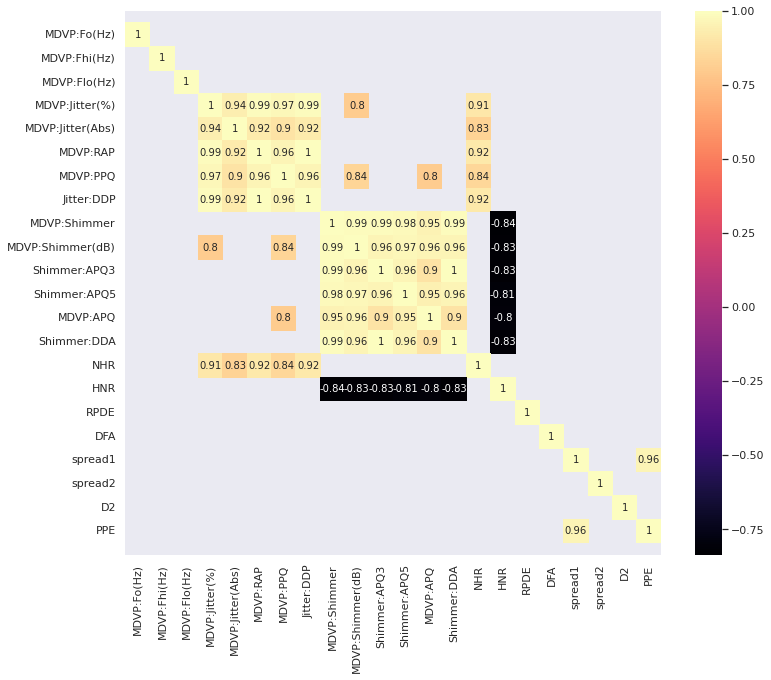

In [ ]:
plt.figure(figsize=(12, 10))
df_corr = df.corr(method='pearson')
ax = sns.heatmap(df_corr[(df_corr >= 0.80) | (df_corr <= -0.80)], annot=True, cmap='magma')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Observations: We can clearly observe here that there are plenty of highly correlated features in our dataset which we need to remove before as part of the data cleaning before we can utilise our dataset for machine learning. High correlation also happens due to imbalanced dataset. So we will try to balance it by using oversampling and then would observe our correlation heatmap again

### Preprocessing and Feature engineering before Model Building

#### Why we do not need to treat the imbalanced dataset via oversampling?

* We observed in the countplot in the EDA section that there is an imbalance between the count of patients and healthy subjects
* To counter this we could have used SMOTE oversampling method which produces sythetic variables for minority class by using k nearest neighbors. 
* But a dataset like that would make our model less efficient while treating real life datasets where we may only find imbalance of datapoints between patients and healthy subjects.

#### We will remove column name as it is not anyway useful for us in model building

In [ ]:
df.drop(columns=['name'],inplace=True)

#### Removing outliers using z-score method:We detected outliers in many features by using IQR method. Since we have less number of rows in our dataset , we ould rather use z-score method to detect outliers. If the z score value is 3 and above i.e if a value is beyond 3 standard deviations we would drop those rows.

In [ ]:
non_obj_cols = df.loc[:, df.dtypes != 'object'].columns.tolist()
z = np.abs(stats.zscore(df[non_obj_cols]))

In [ ]:
df_clean = df[(z<3).all(axis=1)]
df_clean.shape,df.shape

((181, 23), (195, 23))

By using z score method we have removed around 14 outlier rows

#### After removing outliers let us observe the correlation matrix again

(22.5, -0.5)

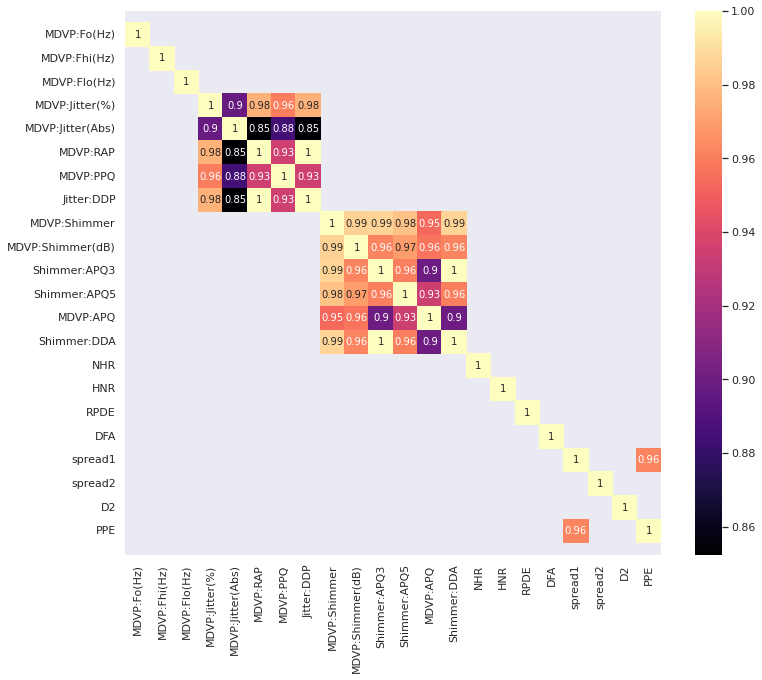

In [ ]:
plt.figure(figsize=(12, 10))
df_corr = df_clean.corr(method='pearson')
ax = sns.heatmap(df_corr[(df_corr >= 0.80) | (df_corr <= -0.80)], annot=True, cmap='magma')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Observations: The correlation matrix after removing outliers contains fewer highly correlated features.This proves the fact that correlation coefficients do get affected by the presence of outliers.

### Let's remove highly correlated features (both negative and positive) from the cleaned up data

In [ ]:
upper_triangle = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype('bool'))
cols_to_drop = [column for column in upper_triangle.columns \
                if any((upper_triangle[column] >= 0.80) | (upper_triangle[column] <= -0.80))]

In [ ]:
cols_to_drop

['MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'PPE']

In [ ]:
df_copy = df_clean.drop(columns=cols_to_drop).copy()

### Let's plot the correlation matrix again after removing correlated variables

(12.5, -0.5)

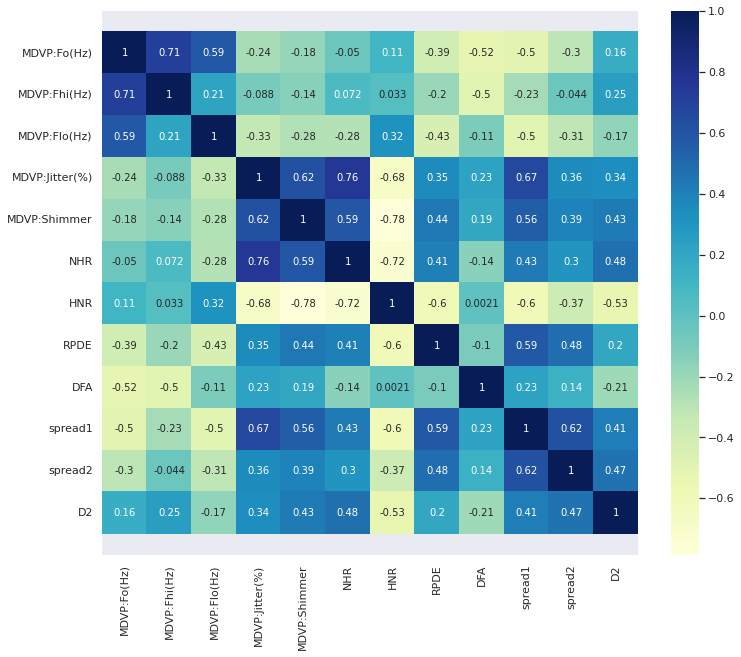

In [ ]:
plt.figure(figsize=(12, 10))
df_corr = df_copy.corr(method='pearson')
ax = sns.heatmap(df_corr, annot=True, cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Shape after removing correlated features

In [ ]:
df_copy.shape

(181, 13)

Now after cleaning we are left with 13 features and 181 rows

### Standardizing continous variables

In [ ]:
X = df_copy.copy()
cont_feat = X.loc[:,X.dtypes != 'object'].columns.tolist()
features = X[cont_feat]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [ ]:
X[cont_feat] = features

In [ ]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2
0,-0.828460,-0.435532,-0.940444,0.807620,1.061787,0.193944,-0.326809,1,-0.759782,1.751873,0.973338,0.554993,-0.136010
1,-0.770944,-0.578076,-0.055103,1.431116,2.219811,0.057021,-0.825146,1,-0.341078,1.828791,1.710893,1.410121,0.387179
2,-0.907521,-0.867037,-0.106734,1.708979,1.626981,-0.244016,-0.424532,1,-0.614577,1.933509,1.343048,1.107991,-0.020835
3,-0.907665,-0.755664,-0.111044,1.529385,1.797395,-0.222653,-0.426323,1,-0.565823,1.823598,1.668601,1.392266,0.157768
4,-0.923477,-0.691245,-0.127258,2.501903,2.411280,-0.021638,-0.680864,1,-0.735059,1.900752,2.038173,0.159416,-0.049275


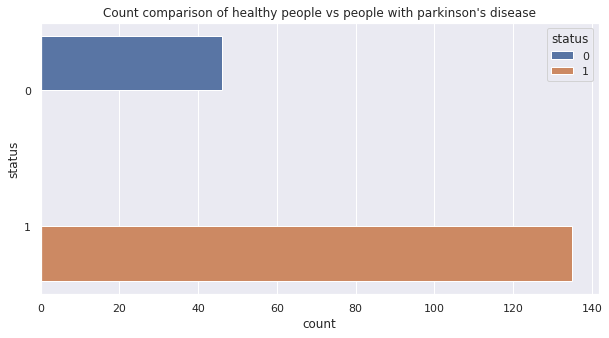

In [ ]:
CountPlot(y = 'status',\
          hue = 'status',\
          data = X,\
          title = "Count comparison of healthy people vs people with parkinson's disease")

In [ ]:
print("Percentage of patients diagnosed as healthy = {0:.2f}%".format((X[X.status == 0].shape[0]/X.shape[0])*100))

Percentage of patients diagnosed as healthy = 25.41%


In [ ]:
print("Percentage of patients diagnosed with Parkinson's disease = {0:.2f} %".format((X[X.status == 1].shape[0]/X.shape[0])*100))

Percentage of patients diagnosed with Parkinson's disease = 74.59 %


#### Observations : After performing some data cleaning and feature engineering we can see that percentage distribution between 2 status has slightly improved

# Building and Analysis of Machine learning models

## Train-Test split (70:30)

In [ ]:
y = X['status'] #------Target variable-------------#
X = X.drop(columns=['status']) #------Features--------#

In [ ]:
y = y.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

#### Analysing the count after split for both test and train data

In [ ]:
print("Percentage of patients diagnosed as healthy in train dataset = {0:.2f}%".format((y_train[y_train == 0].shape[-1]/y_train.shape[-1])*100))

Percentage of patients diagnosed as healthy in train dataset = 25.40%


In [ ]:
print("Percentage of patients diagnosed with Parkinson's disease in train dataset = {0:.2f} %".format((y_train[y_train == 1].shape[-1]/y_train.shape[-1])*100))

Percentage of patients diagnosed with Parkinson's disease in train dataset = 74.60 %


In [ ]:
print("Percentage of patients diagnosed as healthy in test dataset = {0:.2f}%".format((y_test[y_test == 0].shape[-1]/y_test.shape[-1])*100))

Percentage of patients diagnosed as healthy in test dataset = 25.45%


In [ ]:
print("Percentage of patients diagnosed with Parkinson's disease in test dataset = {0:.2f} %".format((y_test[y_test == 1].shape[-1]/y_test.shape[-1])*100))

Percentage of patients diagnosed with Parkinson's disease in test dataset = 74.55 %


#### Observation :  The split in both test and train data is almost in same proportion

## Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
train_scores = []
test_scores = []
c_val = []
for i in tqdm(range(-2,2,1)):
    lr = LogisticRegression(C=pow(10,i))
    lr.fit(X_train, y_train)
    
    c_val.append(pow(10,i))
    train_scores.append(lr.score(X_train,y_train))
    test_scores.append(lr.score(X_test,y_test))

100%|██████████| 4/4 [00:00<00:00, 85.77it/s]


In [ ]:
max_train_score = max(train_scores)
max_train_pos = train_scores.index(max(train_scores))
max_c_val = c_val[max_train_pos]
print("At C = {} the max train score of the Logisitic regression model = {}".format(max_c_val, max_train_score))

At C = 0.1 the max train score of the Logisitic regression model = 0.8492063492063492


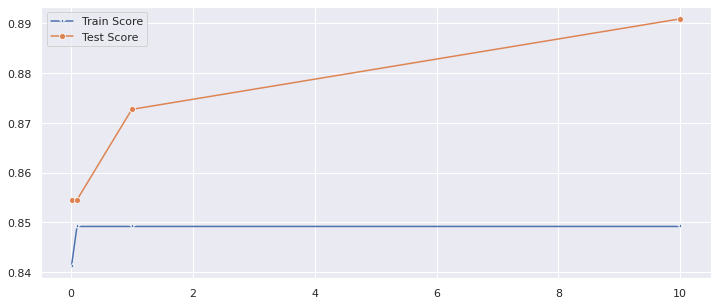

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(c_val,train_scores,marker='*',label='Train Score')
p = sns.lineplot(c_val,test_scores,marker='o',label='Test Score')

#### Observation: From the above plot we can conclude that best model can be fitted at C =  0.1. Hence we would fit our model on test data with C = 0.1

In [ ]:
lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.8545454545454545


Text(0.5, 21.5, 'Predicted label')

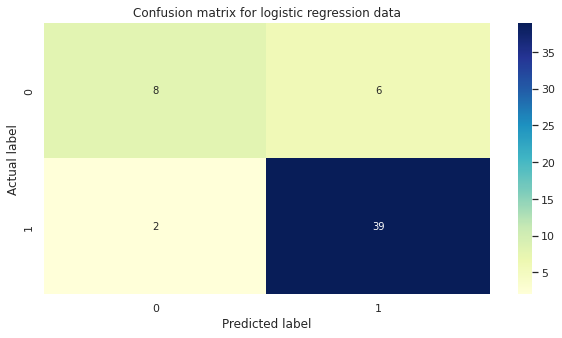

In [ ]:
plt.figure(figsize=(10, 5))
y_pred = lr.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
bottom, top = ax.get_ylim()
p.set_ylim(2, 0.0)
plt.title('Confusion matrix for logistic regression data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.87      0.95      0.91        41

    accuracy                           0.85        55
   macro avg       0.83      0.76      0.79        55
weighted avg       0.85      0.85      0.85        55



## Conclusion:
* The f1-score is a better metric to measure the performance of our model when compared with accuracy, because our data is imbalanced<li>In case if a person is sick and if our model predicts him to be healthy then that would be a risky model
* Here in this case the f1 score for the patients with parkinson's is better at 0.91 i.e the patients who actually have parkinson's have higher chance of getting diagnosed correctly by our logistic regression model.
* Also we have a decent macro average f1 score at 0.79 which signifies that our model can diagnose a person and predict whether he is healthy or sick with high accuracy.
* The weighted average f1 takes into account the class imbalance and assigns higher weightage to the minority class(in this case class of sick person). The score of weighted average of 85% further consolidates our point that this model performs well while classifying the sick.
* For the sake of convinience we ould consider f1-scores as the metric for the model performance moving ahead.<li>We would be more interested in f1-scores of status 1(sick subjects) and macro avg f1 scores

## K nearest nighbour model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
train_scores = []
test_scores = []
k_val = []
for i in tqdm(range(1,7)):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    k_val.append(i)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

100%|██████████| 6/6 [00:00<00:00, 64.55it/s]


In [ ]:
max_train_score = max(train_scores)
max_train_pos = train_scores.index(max(train_scores))
max_k_val = k_val[max_train_pos]
print("At K = {} the max train score of the K nearest neghbour = {}".format(max_k_val, max_train_score))

At K = 1 the max train score of the K nearest neghbour = 1.0


In [ ]:
max_test_score = max(test_scores)
max_test_pos = test_scores.index(max(test_scores))
max_k_val = k_val[max_test_pos]
print("At K = {} the max test score of the K nearest neghbour model = {}".format(max_k_val, max_test_score))

At K = 3 the max test score of the K nearest neghbour model = 0.9636363636363636


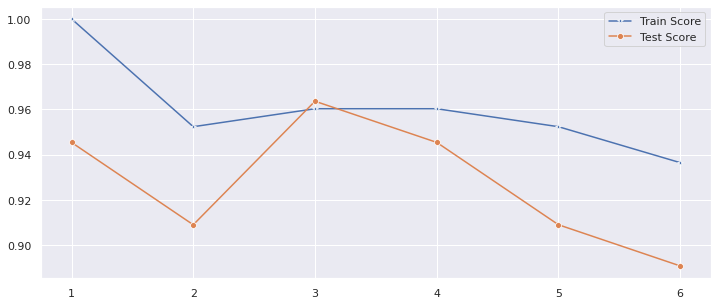

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(k_val,train_scores,marker='*',label='Train Score')
p = sns.lineplot(k_val,test_scores,marker='o',label='Test Score')

#### Observation: From the above plot we can conclude that best model can be fitted at K =  3. Hence we would fit our model on test data with K = 3

In [ ]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9636363636363636


Test accuracy is at 96% but it is not a correct metric to measure the performance of our model

## Confusion Matrix

Text(0.5, 21.5, 'Predicted label')

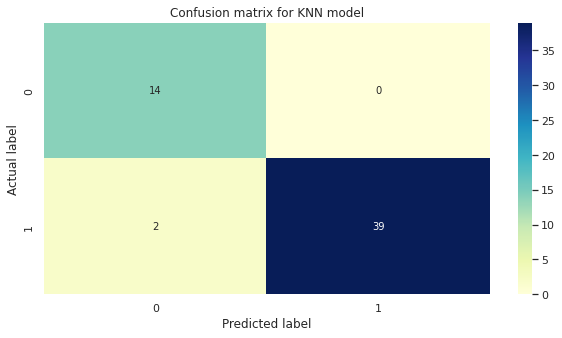

In [ ]:
plt.figure(figsize=(10, 5))
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
bottom, top = ax.get_ylim()
p.set_ylim(2, 0.0)
plt.title('Confusion matrix for KNN model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.95      0.97        41

    accuracy                           0.96        55
   macro avg       0.94      0.98      0.95        55
weighted avg       0.97      0.96      0.96        55



### Conclusion : Our model's macro f1 score and the f1 score in case of status 1(sick subjects) is 0.96 and 0.97 respectively which is very good when compared with logistic regression model

## Support Vector Machine model

We will use gridsearchcv for hyperparameter tuning since we have 2 hyperparameters i.e C and gamma

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
svm.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(svm.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
print(svm.best_estimator_)

SVC(C=10, gamma=0.1)


In [ ]:
svm = SVC(kernel='rbf', C=10, gamma=0.1)
svm.fit(X_train,y_train)
print(svm.score(X_test, y_test))

0.9818181818181818


## Confusion Matrix

Text(0.5, 21.5, 'Predicted label')

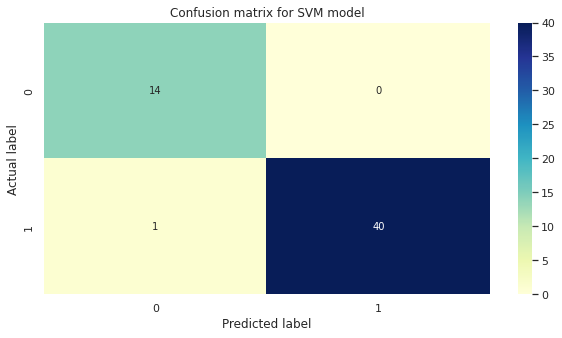

In [ ]:
plt.figure(figsize=(10, 5))
y_pred = svm.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
bottom, top = ax.get_ylim()
p.set_ylim(2, 0.0)
plt.title('Confusion matrix for SVM model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.98      0.99        41

    accuracy                           0.98        55
   macro avg       0.97      0.99      0.98        55
weighted avg       0.98      0.98      0.98        55



### Conclusion : Our model's macro f1 score and the f1 score in case of status 1(sick subjects) is 0.99 and 0.98 respectively which is very good when compared with both logistic regression model and the k nearest neighbor model

# Training a meta classifier

Now we will be using a meta-classifier that would take different models as estimators and would stack them up to come up with the best classifier model. For that we would be using Stacking classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [('lr',lr),('knn',knn)]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(X_train,y_train)
print(sclf.score(X_test,y_test))

0.9818181818181818


* Above we have stacked logistic regression model and k nearest neighbr model and as a result of which our accuracy is 98%
* But we need to check f1 score in order to confirm if our model is better than svm model or not

Text(0.5, 21.5, 'Predicted label')

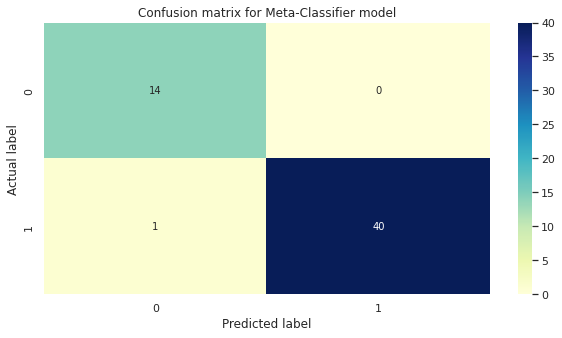

In [ ]:
plt.figure(figsize=(10, 5))
y_pred = sclf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
bottom, top = ax.get_ylim()
p.set_ylim(2, 0.0)
plt.title('Confusion matrix for Meta-Classifier model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.98      0.99        41

    accuracy                           0.98        55
   macro avg       0.97      0.99      0.98        55
weighted avg       0.98      0.98      0.98        55



### Observation:
* So after stacking the logistic regression and knn model(who were not as good as svm model), we got f1 scores almost similar to that of the SVM model
* This proves that ensembling 2 inferior models could result in a superior model

## Using boosting ensemble method

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3,4,5,6,7,8],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'min_child_weight': [0.01,0.001,1]}  
  
xgb = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3) 
xgb.fit(X_train, y_train) 

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END gamma=1, max_depth=3, min_child_weight=0.01;, score=0.808 total time=   0.1s
[CV 2/5] END gamma=1, max_depth=3, min_child_weight=0.01;, score=0.880 total time=   0.0s
[CV 3/5] END gamma=1, max_depth=3, min_child_weight=0.01;, score=0.880 total time=   0.0s
[CV 4/5] END gamma=1, max_depth=3, min_child_weight=0.01;, score=0.960 total time=   0.0s
[CV 5/5] END gamma=1, max_depth=3, min_child_weight=0.01;, score=0.960 total time=   0.0s
[CV 1/5] END gamma=1, max_depth=3, min_child_weight=0.001;, score=0.808 total time=   0.0s
[CV 2/5] END gamma=1, max_depth=3, min_child_weight=0.001;, score=0.880 total time=   0.0s
[CV 3/5] END gamma=1, max_depth=3, min_child_weight=0.001;, score=0.880 total time=   0.0s
[CV 4/5] END gamma=1, max_depth=3, min_child_weight=0.001;, score=0.960 total time=   0.0s
[CV 5/5] END gamma=1, max_depth=3, min_child_weight=0.001;, score=0.960 total time=   0.0s
[CV 1/5] END gamma=1, max_depth=3

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_child_weight': [0.01, 0.001, 1]},
             verbose=3)

In [ ]:
print(xgb.best_params_)

{'gamma': 1, 'max_depth': 4, 'min_child_weight': 1}


In [ ]:
print(xgb.best_estimator_)

XGBClassifier(gamma=1, max_depth=4)


In [ ]:
xgb = XGBClassifier(gamma = 1, max_depth = 4, min_child_weight = 1)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.8909090909090909

Text(0.5, 21.5, 'Predicted label')

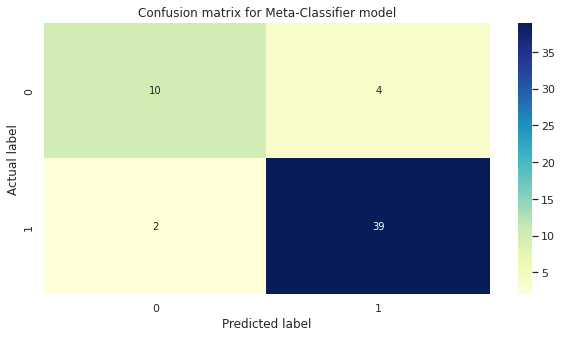

In [ ]:
plt.figure(figsize=(10, 5))
y_pred = xgb.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
bottom, top = ax.get_ylim()
p.set_ylim(2, 0.0)
plt.title('Confusion matrix for Meta-Classifier model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.91      0.95      0.93        41

    accuracy                           0.89        55
   macro avg       0.87      0.83      0.85        55
weighted avg       0.89      0.89      0.89        55



# Final Conclusion and model comparison

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Algorithm", "F1 Score for sick subjects","Macro Avg F1","Weighted Avg F1"]

x.add_row(["Logistic Regression","0.91","0.79","0.85"])
x.add_row(["K nearest neigbour","0.97","0.95","0.96"])
x.add_row(["Support Vector Machine","0.99","0.98","0.98"])
x.add_row(["Stacking Classifier","0.99","0.98","0.98"])
x.add_row(["XGboost Classifier","0.93","0.85","0.89"])
print(x)

+------------------------+----------------------------+--------------+-----------------+
|       Algorithm        | F1 Score for sick subjects | Macro Avg F1 | Weighted Avg F1 |
+------------------------+----------------------------+--------------+-----------------+
|  Logistic Regression   |            0.91            |     0.79     |       0.85      |
|   K nearest neigbour   |            0.97            |     0.95     |       0.96      |
| Support Vector Machine |            0.99            |     0.98     |       0.98      |
|  Stacking Classifier   |            0.99            |     0.98     |       0.98      |
|   XGboost Classifier   |            0.93            |     0.85     |       0.89      |
+------------------------+----------------------------+--------------+-----------------+


* The f1-score is a better metric to measure the performance of our model when compared with accuracy, because our data is imbalanced
* In case if a person is sick and if our model predicts him to be healthy then that would be a risky model, hence we must consider F1 score for sick subjects as well as Macro average F1 score to rate a particular model.
* From above table we could observe that almost all of our models perform decently on the given dataset
* But SVM and our meta classifer where we stacked logistic regression model and k nearest neigbor model perform better than the other models.
* Hence, we can either pick SVM model or the simple stacked ensemble model to predict whether a subject is suffering from Parkinson's disease or not